# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [45]:
from commonfunctions import *
from skimage.filters import gaussian
from skimage import exposure
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''




'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

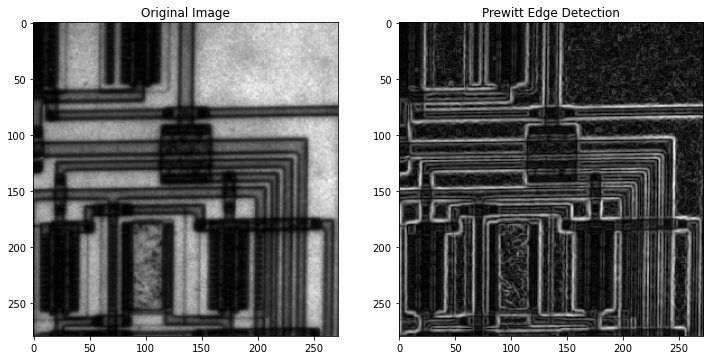

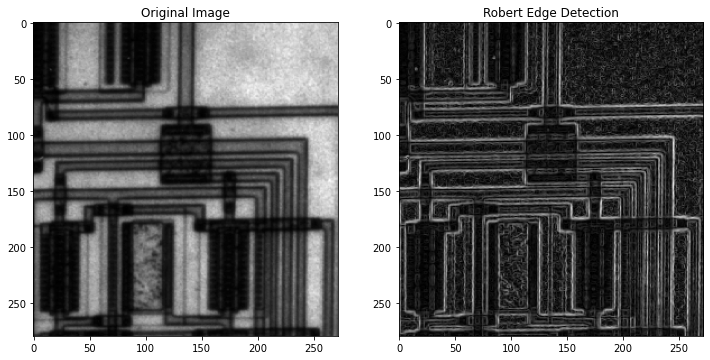

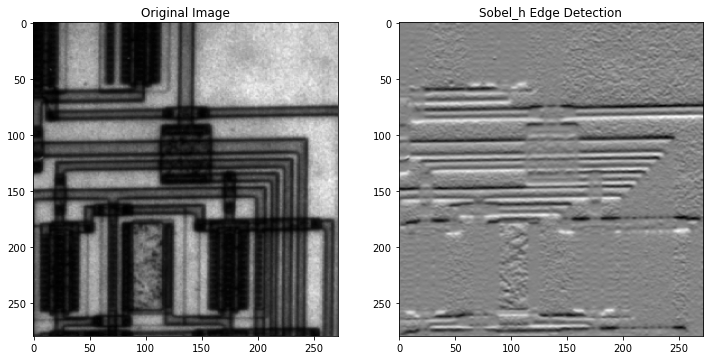

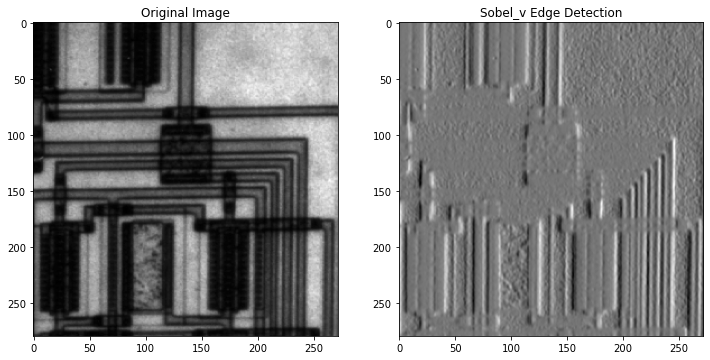

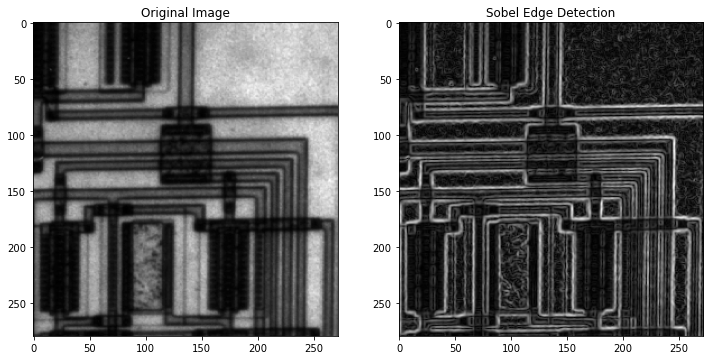

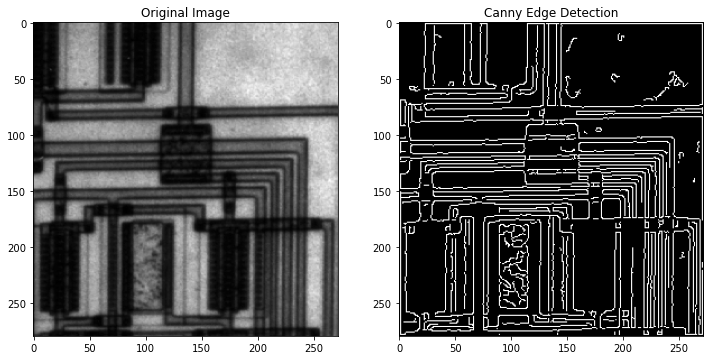

In [47]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

#img = rgb2gray(io.imread('circuit.tif'))
img =io.imread('circuit.tif')

Prewitt=prewitt(img)
Roberts=roberts(img)
sobel_h=sobel_h(img)
sobel_v=sobel_v(img)
sobel=sobel(img)
Canny=canny(img)

show_images([img, Prewitt], ["Original Image", "Prewitt Edge Detection"])
show_images([img, Roberts], ["Original Image", "Robert Edge Detection"])
show_images([img, sobel_h], ["Original Image", "Sobel_h Edge Detection"])
show_images([img, sobel_v], ["Original Image", "Sobel_v Edge Detection"])
show_images([img, sobel], ["Original Image", "Sobel Edge Detection"])
show_images([img,Canny], ["Original Image", "Canny Edge Detection"])


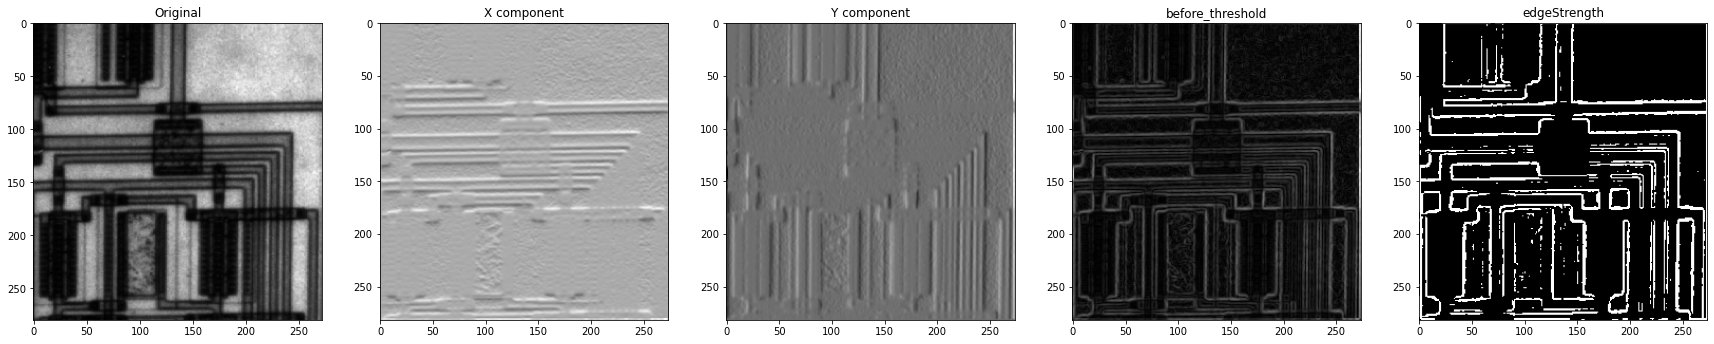

In [48]:
# 2. Custom Sobel (V-H-Both)

def Custom_Sobel(img, theshold):
    hy=[[-1,0,1],[-2,0,2],[-1,0,1]]
    hx=[[-1,-2,-1],[0,0,0],[1,2,1]]

    x_component=convolve2d(img,hx)
    y_component=convolve2d(img,hy)
    edge_strength=np.sqrt(x_component ** 2 + y_component ** 2)
    before_thresh = edge_strength.copy()
    
    edge_strength=np.where(edge_strength>theshold,255,0)
   
    show_images([img, x_component, y_component,  before_thresh, edge_strength], ["Original", "X component","Y component", "before_threshold", "edgeStrength"])


Custom_Sobel(img, 128)




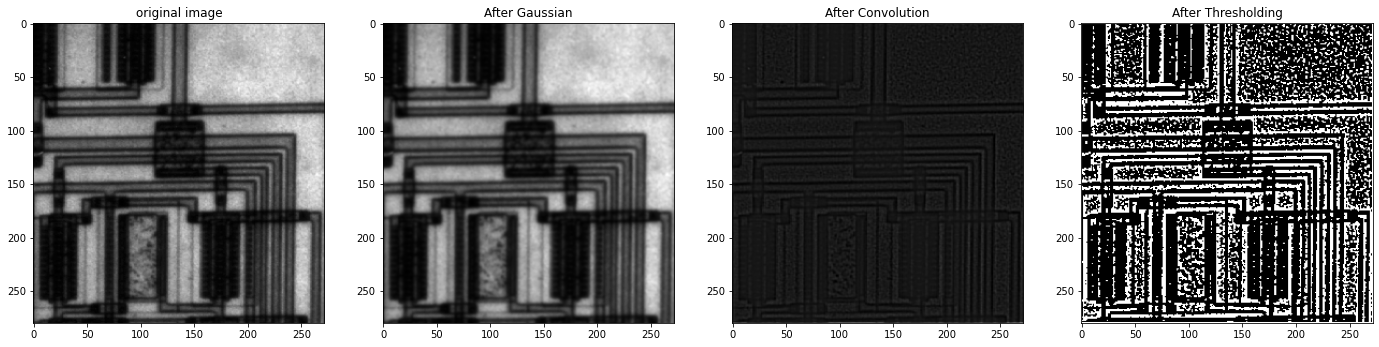

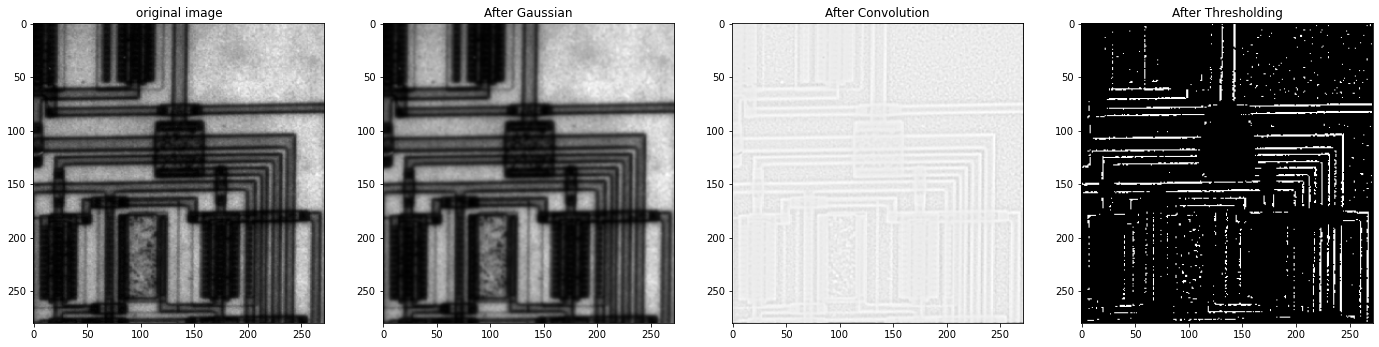

In [49]:
# 3. Custom LoG
thres= 20
def log(img,f,sigma,thres):
    
    img_gaussian=gaussian(img,sigma)
#     print(img_gaussian)
#     print(img_gaussian.shape)
    
    img_convolution=convolve2d(img_gaussian,f,mode='same')
#     print(img_convolution)
#     print(img_convolution.shape)
    
    img_flatten=img_convolution.flatten()
#     print(img_flatten)
#     print(len(img_flatten))
    
    img_flatten[img_flatten<0]=0
    img_flatten[img_flatten>1]=1
#     img_convolution = np.reshape(img_flatten, img_convolution.shape) 
    img_flatten = exposure.rescale_intensity(img_flatten, in_range=(0, 1.0), out_range=(0, 255))
    img_flatten = img_flatten.astype(np.uint8) 
    
    
    img_flatten[img_flatten <= thres] = 0 
    img_flatten[img_flatten > thres] = 255
   
    img_flatten = np.reshape(img_flatten, img.shape)
    
    return (img_gaussian, img_convolution, img_flatten)
    
    

thres = 10
sigma = 0.7

f1 = np.array([
    [-1, -1, -1]  
    ,[-1, 8, -1]   
    ,[-1, -1, -1] 
])

f2 = np.array([
    [0, 1, 0]
    ,[1, -4, 1] 
    ,[0, 1, 0]
])

image_gaussian_1,img_convolution_1,img_thresholding_1 = log(img, f1, sigma, thres)
image_gaussian_2,img_convolution_2,img_thresholding_2 = log(img, f2, sigma, thres)

show_images([img, image_gaussian_1, img_convolution_1, img_thresholding_1],
            ["original image", "After Gaussian", "After Convolution", "After Thresholding"])
show_images([img, image_gaussian_2, img_convolution_2, img_thresholding_2],
            ["original image", "After Gaussian", "After Convolution", "After Thresholding"])



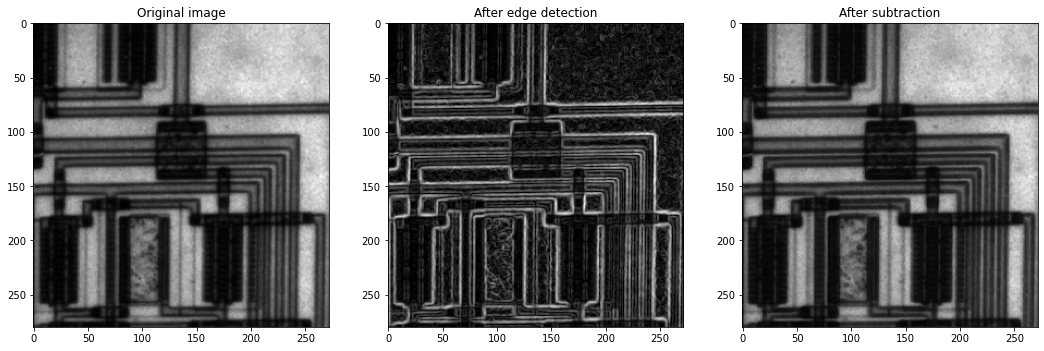

In [50]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

#img =io.imread('circuit.tif')
#image1=sobel(img)
sobel=sobel*0.5

sobel[sobel<0]=0
sobel[sobel>1]=1

image1 = exposure.rescale_intensity(sobel, in_range=(0, 1.0), out_range=(0, 255))
image1 = image1.astype(np.uint8) 
    
sub_img = np.subtract(img, image1)
show_images([img, image1, sub_img], ['Original image', 'After edge detection', 'After subtraction'])